# Boost factors

In weak lensing, the lensing profiles are surpressed due to "boost factors". This poorly-named effect is also known as membership dilution, and occurs in clusters when galaxies that are actually cluster members are confused with background sources. These cluster members are unlensed, and surpress the lensing profile. Thus, to correct the effect one has to "boost" the measured profile by a factor
$$
{\cal B}(R) = \frac{1}{1-f_{\rm cl}(R)}\,,
$$
where $f_{\rm cl}$ are the fraction of galaxies that are actually cluster members at projected distance $R$ away from the center of the cluster.

In this notebook, I will demonstrate two models used in DES, the power law model from Melchior+ (2018):
$$
{\cal B}(R,B_0,R_s,\alpha) = 1+B_0\left(\frac{R}{R_s}\right)^\alpha\,,
$$
and the projected NFW model used by McClintock+ (2019):
$$
{\cal B}(R,B_0,R_s) = 1+B_0\frac{1+F(R/R_s)}{(R/R_s)^2-1}\,,
$$
where $F(x)$ depends on whether the argument is less than or greater than 1 (see the paper).

In [1]:
import numpy as np
import cluster_toolkit as ct
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", size=16, family="serif")

In [3]:
NR = 1000
R = np.logspace(-1, 2.2, NR)

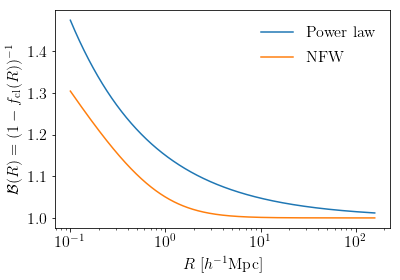

In [4]:
#Power law model
B0 = 0.15 #Typical boost factor amplitude
Rs = 1.0 #Typical boost factor scale radius, Mpc/h comoving
alpha = -0.5 #Boost factor exponent
B_pl = ct.boostfactors.boost_powerlaw_at_R(R, B0, Rs, alpha)

#NFW model
B_nfw = ct.boostfactors.boost_nfw_at_R(R, B0, Rs)

plt.plot(R, B_pl, label=r"Power law")
plt.plot(R, B_nfw, label=r"NFW")
plt.xscale("log")
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"${\cal B}(R) = (1-f_{\rm cl}(R))^{-1}$")
plt.legend(frameon=False)